# Análise Exploratória e Tratamento de Dados - UTI Intensiva (Fiocruz)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('C:/Users/bruno/OneDrive/Desktop/AnalisePreditivaUTI/data/dataUTI.csv', sep=',', encoding='iso-8859-1')

In [3]:
df.head()

,record_id,prontuario,pac_name,dob,data_internacao_hosp,data_internacao_cti,peso,altura,imc,origem,...,desfecho_uti,saida_uti,cp,etapa_2_reviso_gestor_complete,validado,saida_hospital,perfil,cid_saida,desfecho_hosp,etapa_3_validao_coordenador_complete
0,3,10725,ROBSON DA SILVA SEDANO,1980-09-19,2023-03-29,2023-03-29,77.0,"1,70",26.64,"TransferÃªncia externa - EmergÃªncia (UPA, CER...",...,TransferÃªncia inter-hospitalar para outra Enf...,2023-04-13,NÃ£o,Complete,Marcel Treptow,2023-04-17,CTI,A27,Alta,Complete
1,5,10771,CLEVISSON COSTA SANTOS,1978-03-28,2023-04-05,2023-04-05,60.0,"1,70",20.76,TransferÃªncia externa - Enfermaria (outra uni...,...,Ãbito na UTI,2023-04-05,NÃ£o,Complete,Marcel Treptow,2023-04-05,CTI,A15,Ãbito,Complete
2,8,10807,CAMILLA SOUZA MORAES FRANCO,1991-02-26,2023-04-10,2023-04-10,52.0,"1,62",19.81,TransferÃªncia externa - Enfermaria (outra uni...,...,Ãbito na UTI,2023-04-11,NÃ£o,Complete,Marcel Treptow,2023-04-11,CTI,B20.6,Ãbito,Complete
3,9,10626,PAULO ROBERTO PEREIRA DA SILVA,1960-05-19,2023-03-19,2023-03-19,76.0,"1,62",28.96,"TransferÃªncia externa - EmergÃªncia (UPA, CER...",...,Ãbito na UTI,2023-04-11,Sim,Complete,Marcel Treptow,2023-04-11,CTI,I63,Ãbito,Complete
4,10,10389,LUZIA GOMES SILVA,1945-05-14,2023-03-18,2023-04-08,53.0,"1,60",20.70,TransferÃªncia interna - Enfermaria (Centro Ho...,...,Ãbito na UTI,2023-04-09,Sim,Complete,Marcel Treptow,2023-04-09,CTI,A15,Ãbito,Complete


## Análise de Distribuição de valores

In [4]:
for col in df.select_dtypes(include='object').columns:
    print(f"\nDistribuição de valores para '{col}':")
    print(df[col].value_counts())



Distribuição de valores para 'pac_name':
pac_name
ANANIAS RODRIGUES DE OLIVEIRA           3
ANTONIO CARLOS FERREIRA                 2
ANTONIO ANSELMO FERNANDES JUNIOR        2
ALESSANDRA CRISTINA DA CUNHA PEREIRA    2
LEANDRO CAMELO DA SILVA                 2
                                       ..
JOSBERTO RODRIGUES ALVES                1
PAULO ROBERTO DE JESUS                  1
KETELIN SILVA DE PAIVA                  1
FRANCISCO CESAR LOPES MOTA              1
DAMIAO NOGUEIRA DA CUNHA                1
Name: count, Length: 410, dtype: int64

Distribuição de valores para 'dob':
dob
1981-12-23    3
1986-01-01    2
1972-03-17    2
1994-02-09    2
1979-07-18    2
             ..
1971-08-15    1
1969-07-15    1
2005-06-25    1
1955-06-18    1
1975-08-06    1
Name: count, Length: 402, dtype: int64

Distribuição de valores para 'data_internacao_hosp':
data_internacao_hosp
2023-05-07    6
2023-04-27    5
2024-06-07    5
2023-04-30    5
2023-07-13    5
             ..
2022-12-24    1
2023-

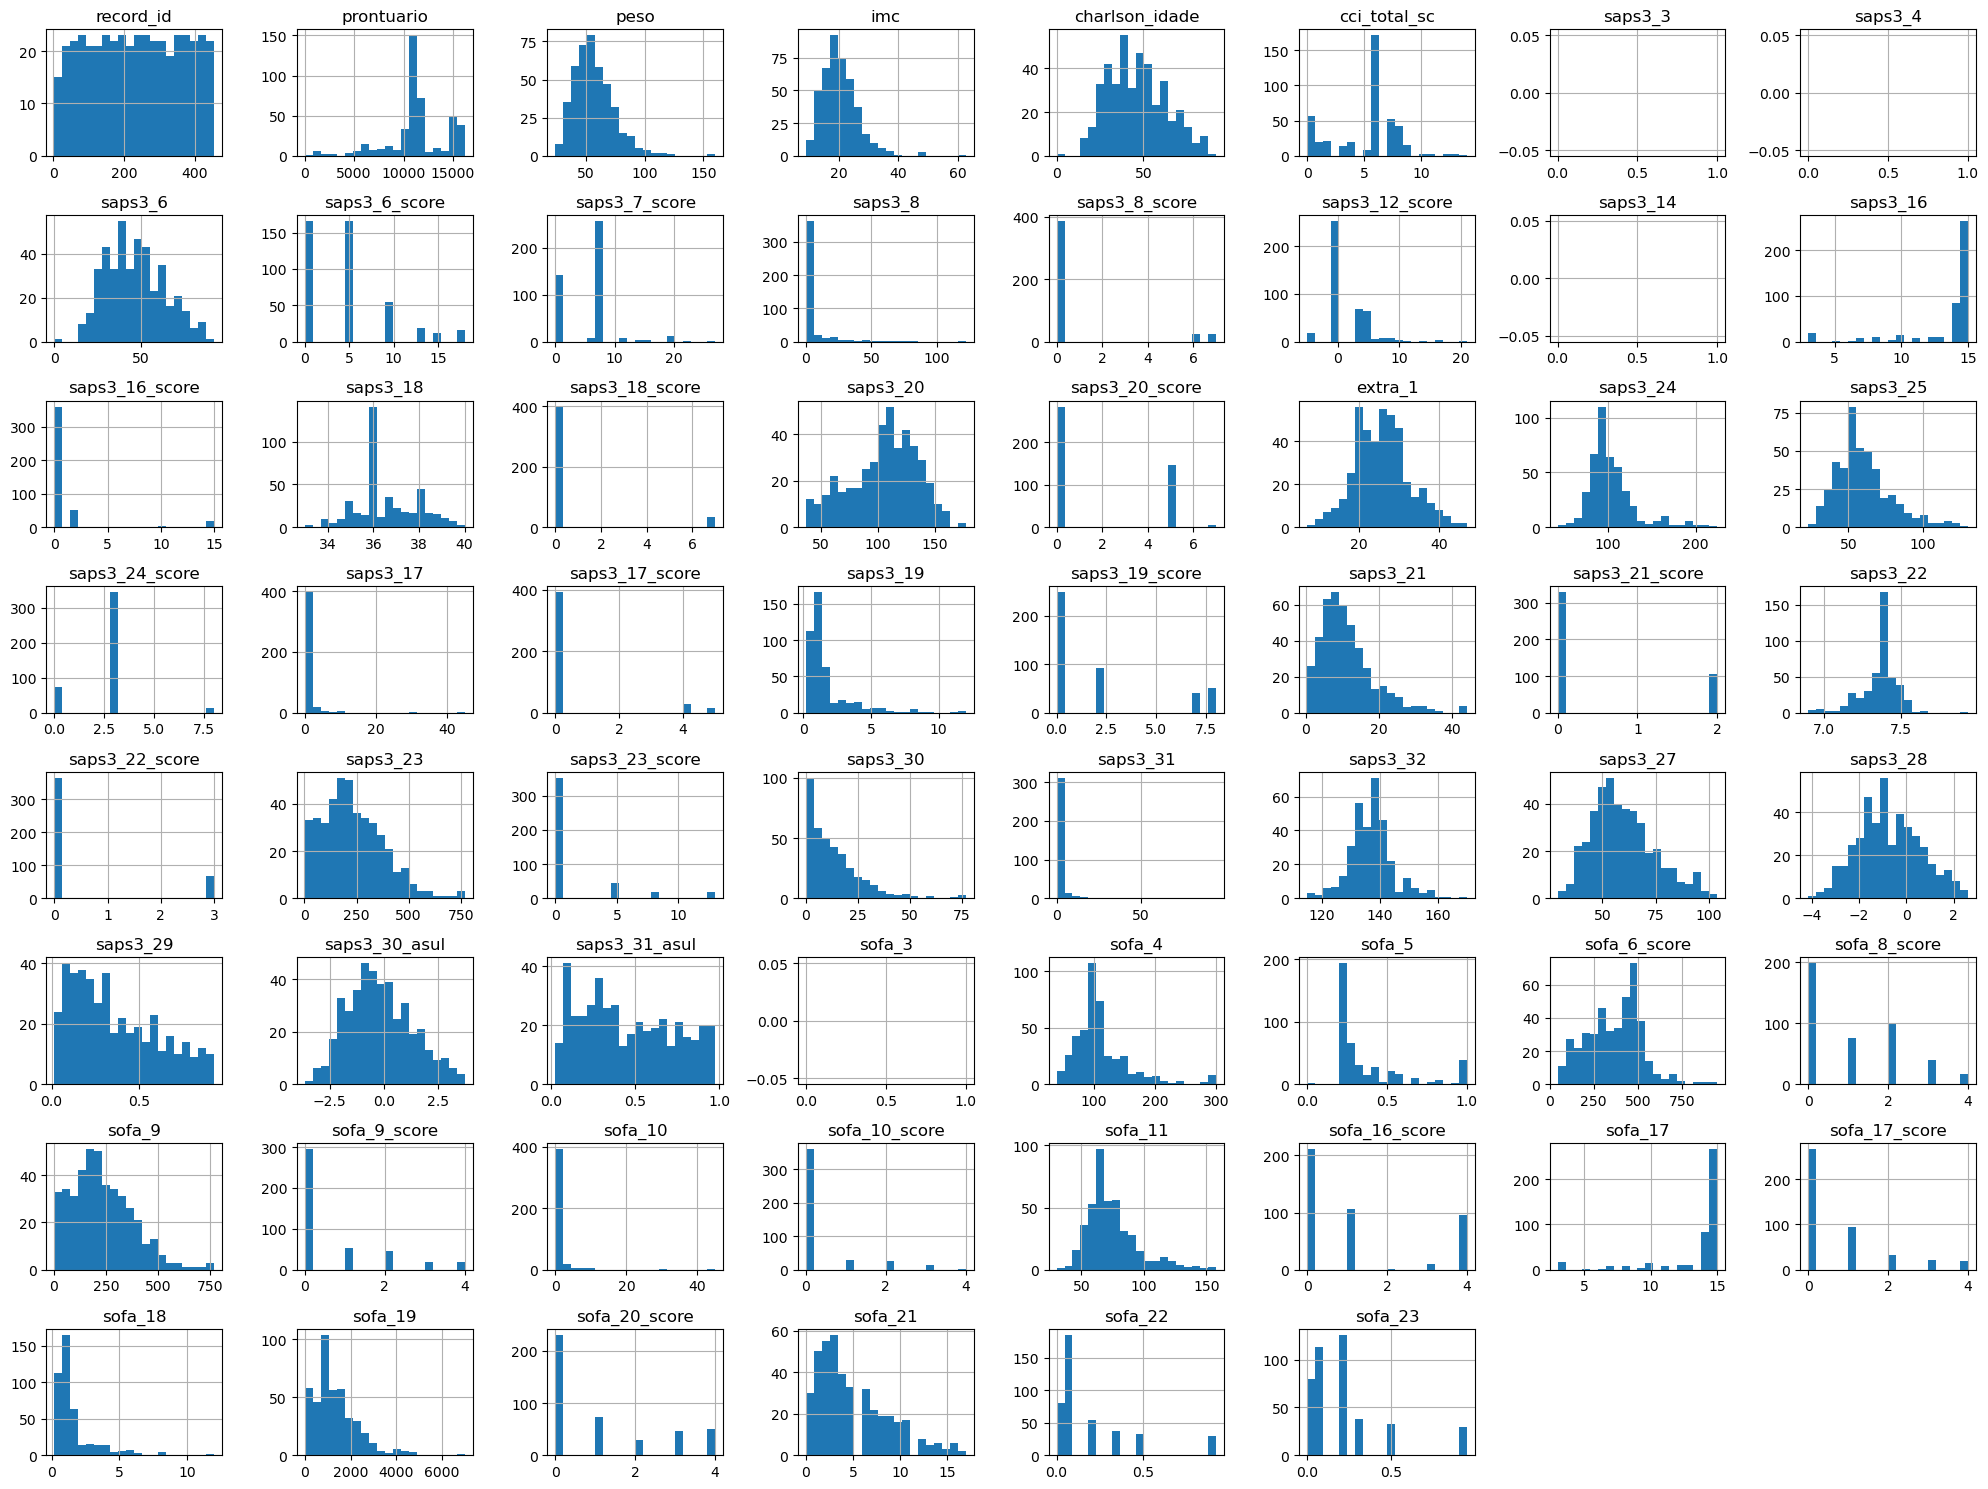

In [5]:
import matplotlib.pyplot as plt

# Gerar histogramas para variáveis numéricas
df.select_dtypes(include='number').hist(figsize=(20, 15), bins=20)
plt.tight_layout()
plt.show()


In [6]:
# Lista das colunas desejadas
colunas_desejadas = [
    "record_id", "charlson_idade", "data_internacao_cti", "imc", "linha_cuidado",
    "diagnostico_int___1", "diagnostico_int___2", "comorbid___19",
    "saps3_20", "extra_1", "saps3_19", "saps3_21", "saps3_22",
    "saps3_23", "sofa_8_score", "sofa_10", "desfecho_uti", "saida_uti"
]

# Dicionário de renomeação
novos_nomes_colunas = {
    "record_id": "ID Registro",
    "charlson_idade": "Idade",
    "data_internacao_cti": "Data de Internação CTI",
    "imc": "IMC",
    "linha_cuidado": "Linha de Cuidado",
    "diagnostico_int___1": "HIV",
    "diagnostico_int___2": "Tuberculose",
    "comorbid___19": "AIDS",
    "saps3_20": "Frequência Cardíaca",
    "extra_1": "Frequência Respiratória",
    "saps3_19": "Creatinina",
    "saps3_21": "Leucócitos",
    "saps3_22": "pH",
    "saps3_23": "Contagem de Plaquetas",
    "sofa_8_score": "Score Respiratório",
    "sofa_10": "Bilirrubina",
    "desfecho_uti": "Desfecho UTI",
    "saida_uti": "Saída UTI"
}

# Filtrar as colunas no DataFrame
df_filtrado = df[colunas_desejadas].rename(columns=novos_nomes_colunas)

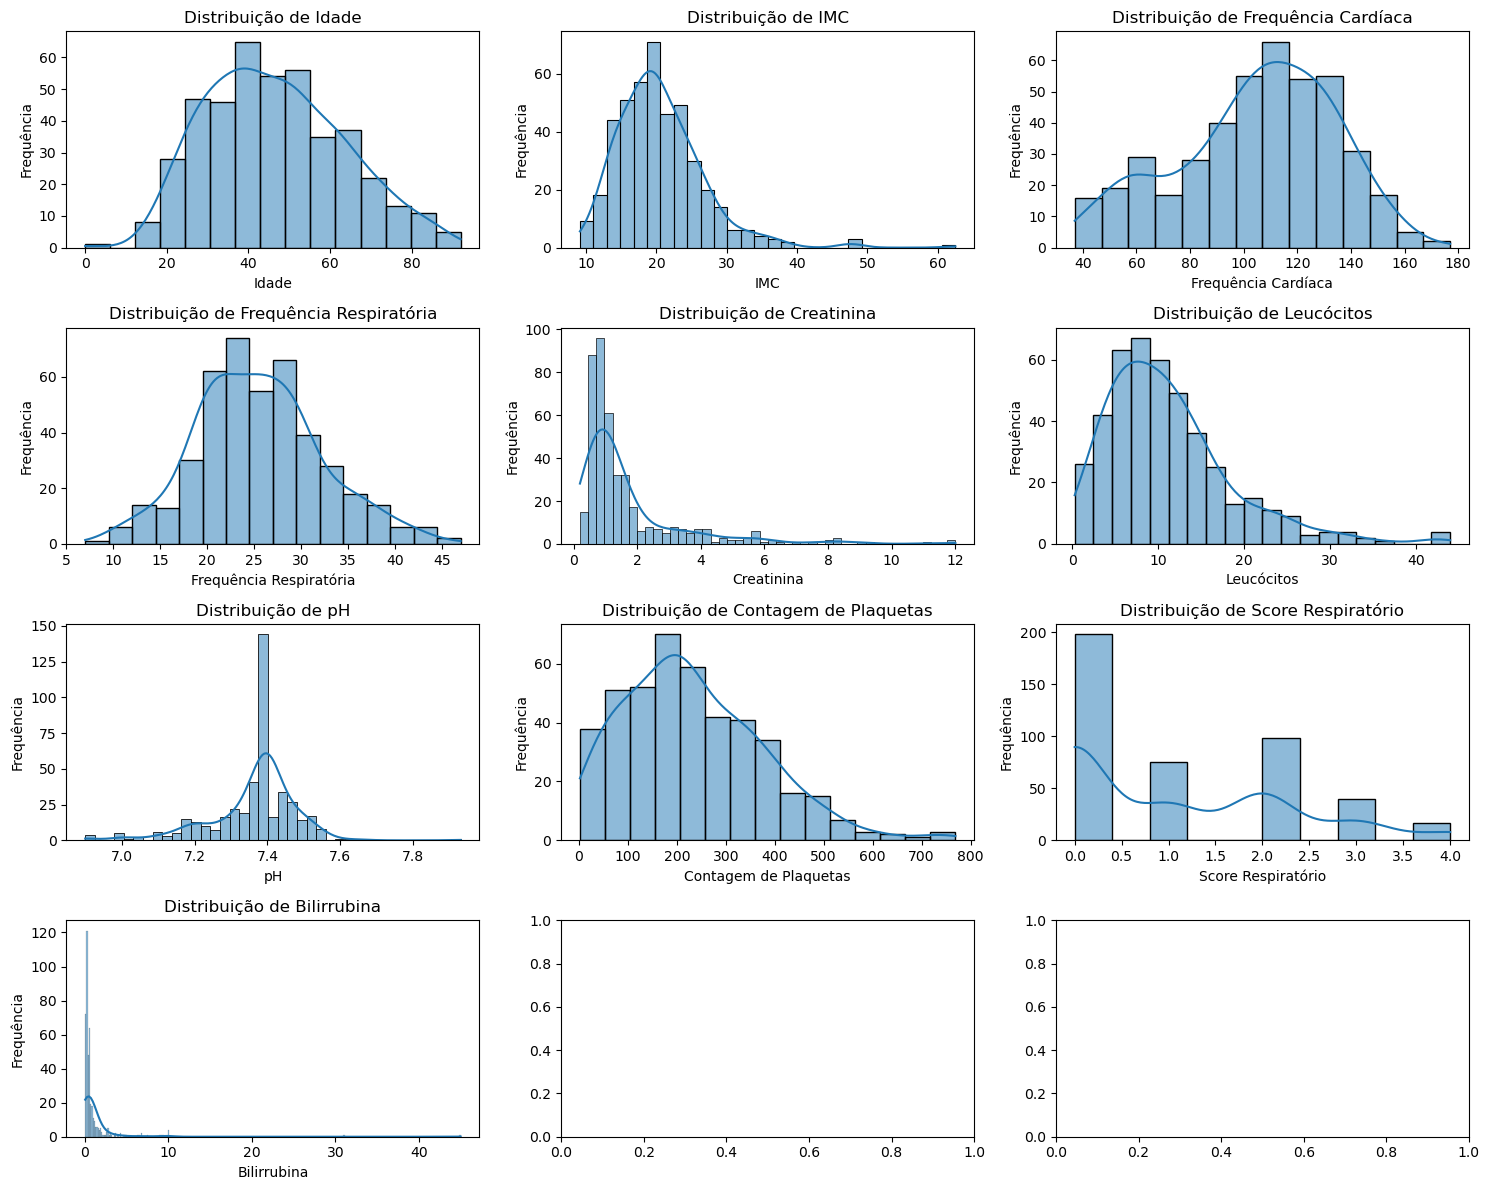

In [7]:
# Lista de variáveis numéricas
numerical_cols = ['Idade', 'IMC', 'Frequência Cardíaca', 'Frequência Respiratória', 
                  'Creatinina', 'Leucócitos', 'pH', 'Contagem de Plaquetas', 
                  'Score Respiratório', 'Bilirrubina']
n_rows = 4
n_cols = 3

fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.histplot(df_filtrado[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribuição de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

In [8]:
# Dicionário de correções
correcoes = {
    "TransferÃªncia intra-hospitalar para outra Enfermaria (Centro Hospitalar)": "Transferência intra-hospitalar para outra Enfermaria",
    "Ãbito na UTI": "Óbito na UTI",
    "Alta para residÃªncia": "Alta para residência",
    "TransferÃªncia inter-hospitalar para outra Enfermaria (Outra unidade hospitalar)": "Transferência inter-hospitalar para outra Enfermaria",
    "TransferÃªncia inter-hospitalar para outra UTI/UCI (Outra unidade hospitalar)": "Transferência inter-hospitalar para outra UTI/UCI",
    "Alta Ã  revelia": "Alta à revelia",
    "TransferÃªncia intra-hospitalar para outra UTI/UCI (Centro Hospitalar)": "Transferência intra-hospitalar para outra UTI/UCI",
    "TransferÃªncia para unidade cuidados contÃ­nuos (casa repouso, abrigo e outros)": "Transferência para unidade de cuidados contínuos"
}

# Substituir os valores no DataFrame
df_filtrado["Desfecho UTI"] = df_filtrado["Desfecho UTI"].replace(correcoes)

# Verificar as correções
print(df_filtrado["Desfecho UTI"].value_counts())

Desfecho UTI
Transferência intra-hospitalar para outra Enfermaria    210
Óbito na UTI                                            123
Alta para residência                                     21
Transferência inter-hospitalar para outra Enfermaria      8
Transferência inter-hospitalar para outra UTI/UCI         8
Alta Ã  revelia                                           1
Transferência intra-hospitalar para outra UTI/UCI         1
Transferência para unidade de cuidados contínuos          1
Name: count, dtype: int64


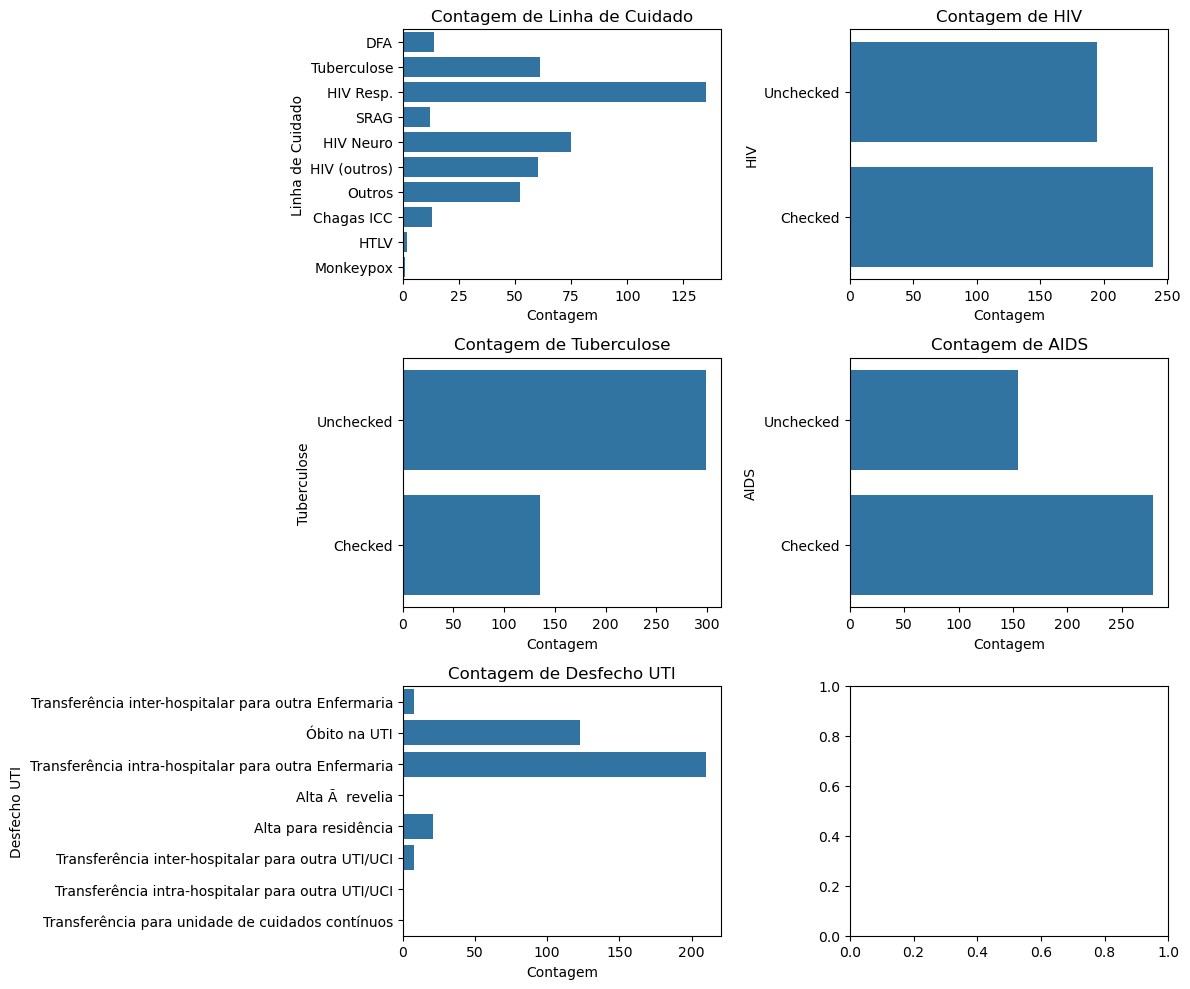

In [9]:
# Lista de variáveis categóricas
categorical_cols = ['Linha de Cuidado', 'HIV', 'Tuberculose', 'AIDS', 'Desfecho UTI']

# Número de linhas e colunas para o grid de gráficos
n_rows_cat = 3
n_cols_cat = 2

# Criação do grid de gráficos
fig_cat, axes_cat = plt.subplots(nrows=n_rows_cat, ncols=n_cols_cat, figsize=(12, 10))
axes_cat = axes_cat.flatten()

# Para cada variável categórica, cria-se um gráfico de barras com eixo invertido
for i, col in enumerate(categorical_cols):
    sns.countplot(data=df_filtrado, y=col, ax=axes_cat[i], orient='h')
    axes_cat[i].set_title(f'Contagem de {col}')
    axes_cat[i].set_xlabel('Contagem')
    axes_cat[i].set_ylabel(col)

# Ajuste o layout para que os gráficos não se sobreponham
plt.tight_layout()
plt.show()

In [10]:
# Análise descritiva
df_filtrado.describe()

,ID Registro,Idade,IMC,Frequência Cardíaca,Frequência Respiratória,Creatinina,Leucócitos,pH,Contagem de Plaquetas,Score Respiratório,Bilirrubina
count,434.000000,428.000000,434.000000,434.000000,434.000000,434.000000,434.000000,433.000000,434.000000,428.000000,431.000000
mean,233.412442,46.535047,20.546175,104.672811,25.421659,1.708226,11.210714,7.363903,232.116129,1.072430,1.061787
std,128.666183,16.681089,6.211999,29.363515,6.779237,1.775566,7.424992,0.119064,143.081478,1.192045,3.016149
min,3.000000,0.000000,9.130000,37.000000,7.000000,0.200000,0.300000,6.900000,2.000000,0.000000,0.030000
25%,123.250000,33.750000,16.372500,86.250000,20.000000,0.770000,6.000000,7.320000,126.250000,0.000000,0.200000
50%,233.500000,45.000000,19.720000,110.000000,25.000000,1.000000,10.000000,7.400000,211.500000,1.000000,0.400000
75%,345.750000,58.250000,23.720000,127.000000,30.000000,1.762500,14.375000,7.420000,324.500000,2.000000,0.760000
max,455.000000,92.000000,62.500000,177.000000,47.000000,12.000000,44.000000,7.930000,769.000000,4.000000,45.000000


In [11]:
df_filtrado.isnull().sum()

ID Registro                 0
Idade                       6
Data de Internação CTI      0
IMC                         0
Linha de Cuidado            9
HIV                         0
Tuberculose                 0
AIDS                        0
Frequência Cardíaca         0
Frequência Respiratória     0
Creatinina                  0
Leucócitos                  0
pH                          1
Contagem de Plaquetas       0
Score Respiratório          6
Bilirrubina                 3
Desfecho UTI               61
Saída UTI                  61
dtype: int64

## Análise das Variáveis

### IMC

In [12]:
df_filtrado['IMC'].value_counts().sort_index()

IMC
9.13     1
9.72     1
9.93     1
9.99     1
10.14    1
        ..
39.06    1
47.26    1
47.45    1
48.07    1
62.50    1
Name: count, Length: 354, dtype: int64

<Axes: xlabel='IMC', ylabel='Count'>

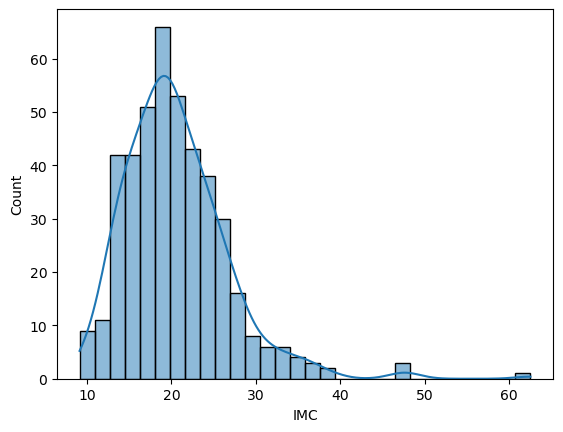

In [13]:
sns.histplot(df_filtrado, x='IMC', bins=30, kde=True, stat='count')

### Linha Cuidado

In [14]:
df_filtrado['Linha de Cuidado'].value_counts()

Linha de Cuidado
HIV Resp.       135
HIV Neuro        75
Tuberculose      61
HIV (outros)     60
Outros           52
DFA              14
Chagas ICC       13
SRAG             12
HTLV              2
Monkeypox         1
Name: count, dtype: int64

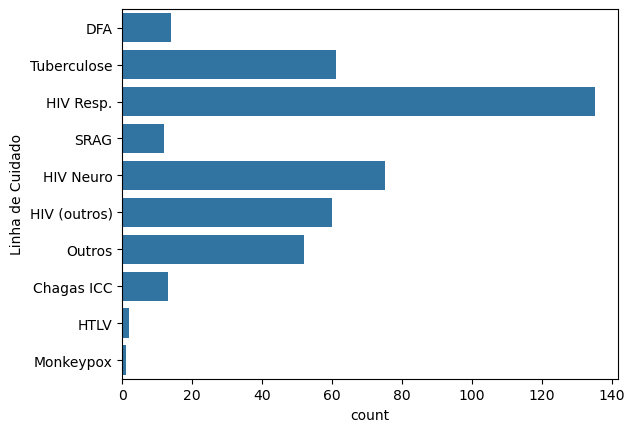

In [15]:
sns.countplot(y='Linha de Cuidado', data=df_filtrado);

### HIV

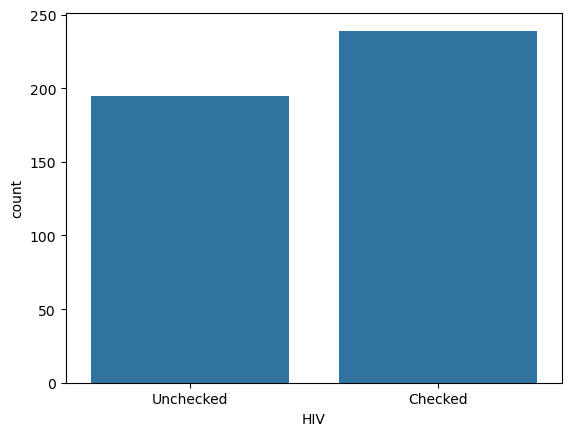

In [16]:
sns.countplot(x='HIV', data=df_filtrado);

### Tuberculose

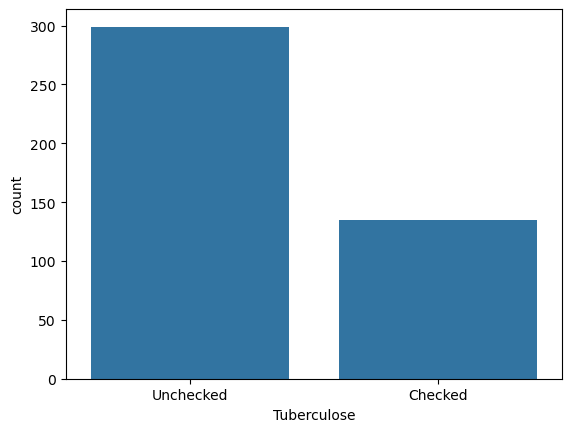

In [17]:
sns.countplot(x='Tuberculose', data=df_filtrado);

### AIDS

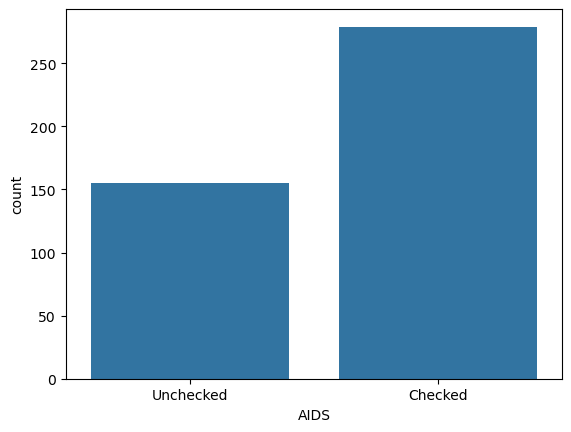

In [18]:
sns.countplot(x='AIDS', data=df_filtrado);

### Frequência Cardíaca

In [19]:
df_filtrado['Frequência Cardíaca'].value_counts().sort_index()

Frequência Cardíaca
37     1
38     2
39     1
40     4
42     4
      ..
157    1
159    2
160    2
170    1
177    1
Name: count, Length: 113, dtype: int64

<Axes: xlabel='Frequência Cardíaca', ylabel='Count'>

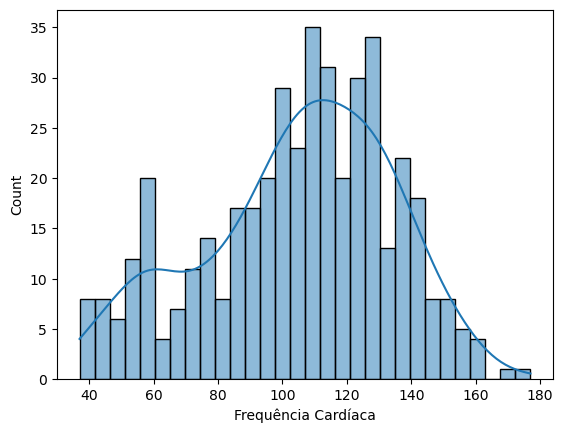

In [20]:
sns.histplot(df_filtrado, x='Frequência Cardíaca', bins=30, kde=True, stat='count')

### Frequência Respiratória

In [21]:
df_filtrado['Frequência Respiratória'].value_counts().sort_index()

Frequência Respiratória
7      1
10     4
11     2
12     5
13     3
14     6
15     6
16     7
17     7
18    18
19     5
20    51
21    11
22    34
23    17
24    23
25    30
26    25
27    16
28    36
29    14
30    32
31     7
32    14
33     6
34     8
35     8
36    10
37     4
38     7
39     3
40     5
41     1
42     4
43     2
45     1
47     1
Name: count, dtype: int64

<Axes: xlabel='Frequência Respiratória', ylabel='Count'>

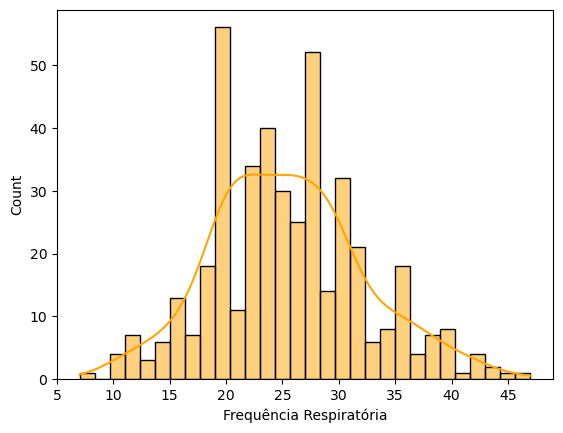

In [22]:
sns.histplot(df_filtrado, x='Frequência Respiratória', bins=30, color='orange', kde=True, stat='count')

### Creatinina

In [23]:
df_filtrado['Creatinina'].value_counts().sort_index()

Creatinina
0.20     1
0.29     1
0.30     2
0.32     1
0.35     1
        ..
8.38     1
9.00     1
9.20     1
11.00    1
12.00    2
Name: count, Length: 156, dtype: int64

<Axes: xlabel='Creatinina', ylabel='Count'>

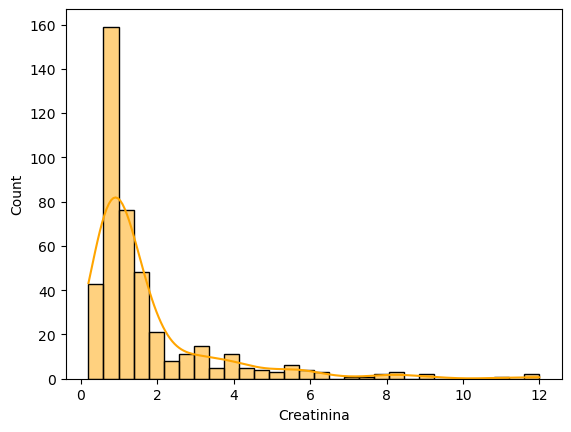

In [24]:
sns.histplot(df_filtrado, x='Creatinina', bins=30, color='orange', kde=True, stat='count')

### Leucócitos

In [25]:
df_filtrado['Leucócitos'].value_counts().sort_index()

Leucócitos
0.30     1
0.40     1
0.90     1
0.95     1
1.00     1
        ..
37.00    1
41.90    1
42.00    1
42.46    1
44.00    1
Name: count, Length: 211, dtype: int64

<Axes: xlabel='Leucócitos', ylabel='Count'>

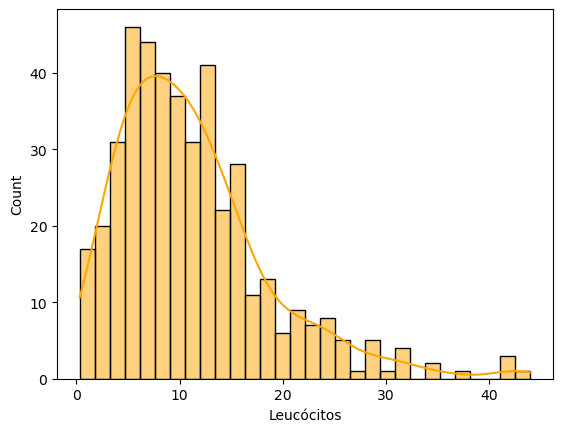

In [26]:
sns.histplot(df_filtrado, x='Leucócitos', bins=30, color='orange', kde=True, stat='count')

### pH

In [27]:
df_filtrado['pH'].value_counts().sort_index()

pH
6.90      4
6.99      1
7.00      4
7.02      1
7.05      2
7.09      1
7.10      2
7.11      3
7.12      2
7.13      1
7.14      2
7.15      1
7.16      2
7.17      4
7.18      4
7.19      7
7.20     10
7.21      3
7.22      4
7.23      4
7.24      2
7.25      4
7.26      3
7.27      7
7.28      3
7.29      6
7.30      7
7.31      7
7.32      8
7.33      5
7.34     14
7.35     18
7.36     10
7.37     13
7.38     19
7.39     20
7.40    105
7.41     10
7.42      6
7.43      7
7.44     19
7.45      8
7.46     10
7.47      7
7.48     10
7.49      4
7.50     10
7.51      7
7.52      5
7.53      5
7.54      4
7.55      1
7.56      3
7.59      1
7.63      1
7.66      1
7.93      1
Name: count, dtype: int64

<Axes: xlabel='pH', ylabel='Count'>

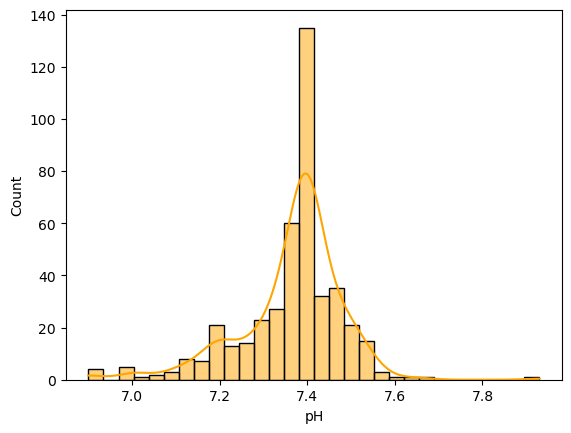

In [28]:
sns.histplot(df_filtrado, x='pH', bins=30, color='orange', kde=True, stat='count')

### Contagem de Plaquetas

In [29]:
df_filtrado['Contagem de Plaquetas'].value_counts().sort_index()

Contagem de Plaquetas
2.0      1
5.0      1
9.0      1
10.0     2
12.0     1
        ..
660.0    1
714.0    1
732.0    1
747.0    1
769.0    1
Name: count, Length: 278, dtype: int64

<Axes: xlabel='Contagem de Plaquetas', ylabel='Count'>

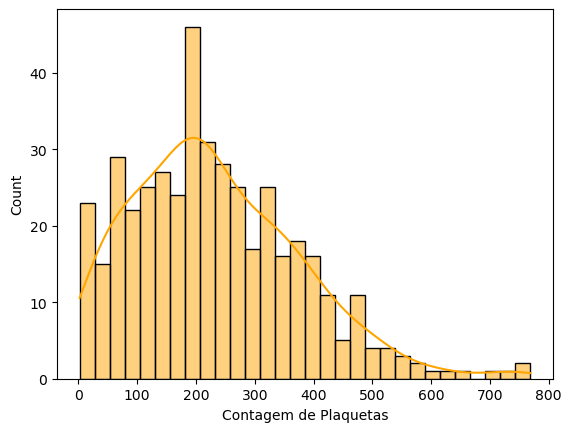

In [30]:
sns.histplot(df_filtrado, x='Contagem de Plaquetas', bins=30, color='orange', kde=True, stat='count')

### Score respiratório

In [31]:
df_filtrado['Score Respiratório'].value_counts().sort_index()

Score Respiratório
0.0    198
1.0     75
2.0     98
3.0     40
4.0     17
Name: count, dtype: int64

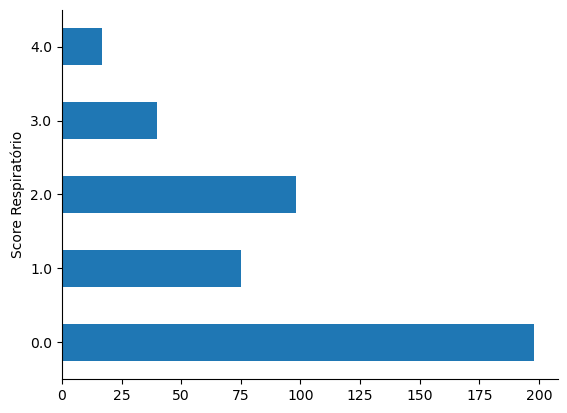

In [32]:
df_filtrado.groupby('Score Respiratório').size().plot(kind='barh')
plt.gca().spines[['top', 'right',]].set_visible(False)

### Desfecho UTI

In [33]:
df_filtrado['Desfecho UTI'].value_counts()

Desfecho UTI
Transferência intra-hospitalar para outra Enfermaria    210
Óbito na UTI                                            123
Alta para residência                                     21
Transferência inter-hospitalar para outra Enfermaria      8
Transferência inter-hospitalar para outra UTI/UCI         8
Alta Ã  revelia                                           1
Transferência intra-hospitalar para outra UTI/UCI         1
Transferência para unidade de cuidados contínuos          1
Name: count, dtype: int64

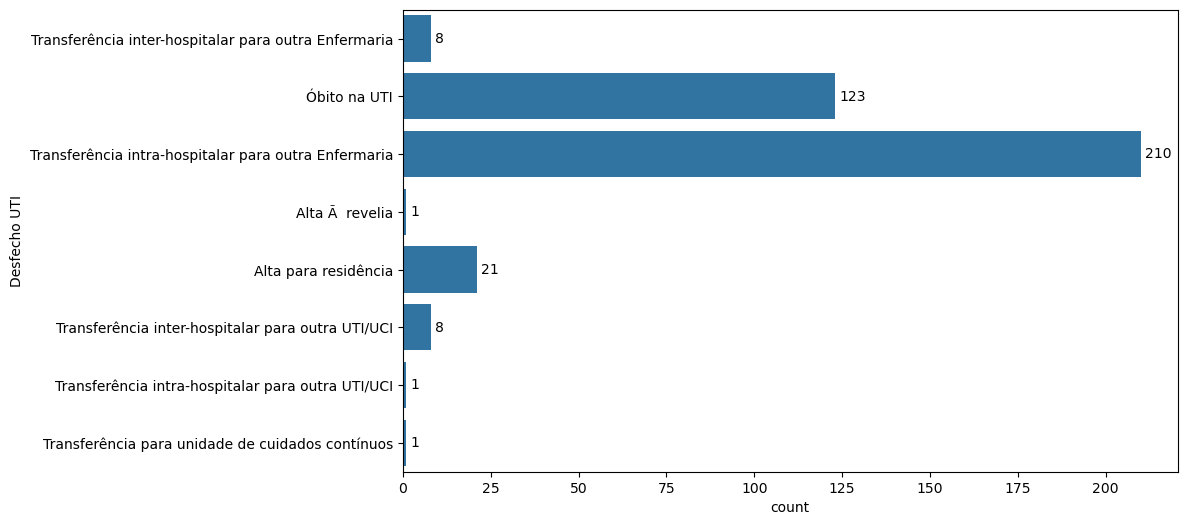

In [34]:
plt.figure(figsize=(10, 6))
ax = sns.countplot(y='Desfecho UTI', data=df_filtrado)
for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, padding=3)
plt.show()

## Análise dos Tipos de Atributos

In [35]:
df_filtrado.dtypes

ID Registro                  int64
Idade                      float64
Data de Internação CTI      object
IMC                        float64
Linha de Cuidado            object
HIV                         object
Tuberculose                 object
AIDS                        object
Frequência Cardíaca          int64
Frequência Respiratória      int64
Creatinina                 float64
Leucócitos                 float64
pH                         float64
Contagem de Plaquetas      float64
Score Respiratório         float64
Bilirrubina                float64
Desfecho UTI                object
Saída UTI                   object
dtype: object

In [36]:
df_filtrado['Data de Internação CTI'] = pd.to_datetime(df_filtrado['Data de Internação CTI'], errors='coerce')
df_filtrado['Saída UTI'] = pd.to_datetime(df_filtrado['Saída UTI'], errors='coerce')

In [37]:
df_filtrado['Tempo na UTI'] = (df_filtrado['Saída UTI'] - df_filtrado['Data de Internação CTI']).dt.days

In [38]:
df_filtrado.dtypes

ID Registro                         int64
Idade                             float64
Data de Internação CTI     datetime64[ns]
IMC                               float64
Linha de Cuidado                   object
HIV                                object
Tuberculose                        object
AIDS                               object
Frequência Cardíaca                 int64
Frequência Respiratória             int64
Creatinina                        float64
Leucócitos                        float64
pH                                float64
Contagem de Plaquetas             float64
Score Respiratório                float64
Bilirrubina                       float64
Desfecho UTI                       object
Saída UTI                  datetime64[ns]
Tempo na UTI                      float64
dtype: object

## Tratamento de campos vazios

In [47]:
# Relação de quantidade
df_filtrado.isnull().sum()

ID Registro                 0
Idade                       6
Data de Internação CTI      0
IMC                         0
Linha de Cuidado            9
HIV                         0
Tuberculose                 0
AIDS                        0
Frequência Cardíaca         0
Frequência Respiratória     0
Creatinina                  0
Leucócitos                  0
pH                          1
Contagem de Plaquetas       0
Score Respiratório          6
Bilirrubina                 3
Desfecho UTI               61
Saída UTI                  61
Tempo na UTI               61
dtype: int64

In [48]:
dados2= df_filtrado.dropna(subset=['Saída UTI'])

In [49]:
dados2.isnull().sum()

ID Registro                0
Idade                      6
Data de Internação CTI     0
IMC                        0
Linha de Cuidado           8
HIV                        0
Tuberculose                0
AIDS                       0
Frequência Cardíaca        0
Frequência Respiratória    0
Creatinina                 0
Leucócitos                 0
pH                         1
Contagem de Plaquetas      0
Score Respiratório         5
Bilirrubina                2
Desfecho UTI               0
Saída UTI                  0
Tempo na UTI               0
dtype: int64

In [50]:
dados2= dados2.dropna(subset=['Linha de Cuidado'])

In [51]:
dados2.isnull().sum()

ID Registro                0
Idade                      6
Data de Internação CTI     0
IMC                        0
Linha de Cuidado           0
HIV                        0
Tuberculose                0
AIDS                       0
Frequência Cardíaca        0
Frequência Respiratória    0
Creatinina                 0
Leucócitos                 0
pH                         1
Contagem de Plaquetas      0
Score Respiratório         5
Bilirrubina                2
Desfecho UTI               0
Saída UTI                  0
Tempo na UTI               0
dtype: int64

In [52]:
# Substituir os valores missing pela média
dados2.update(dados2.select_dtypes(include=['float64', 'int64']).apply(lambda col: col.fillna(col.median())))

In [53]:
dados2.isnull().sum()

ID Registro                0
Idade                      0
Data de Internação CTI     0
IMC                        0
Linha de Cuidado           0
HIV                        0
Tuberculose                0
AIDS                       0
Frequência Cardíaca        0
Frequência Respiratória    0
Creatinina                 0
Leucócitos                 0
pH                         0
Contagem de Plaquetas      0
Score Respiratório         0
Bilirrubina                0
Desfecho UTI               0
Saída UTI                  0
Tempo na UTI               0
dtype: int64

## Análise Estatística Descritiva

In [ ]:
dados2.describe()

In [ ]:
dados2.shape

## Tratando valores incoerentes

In [ ]:
dados2.Idade.mean()

In [ ]:
# Desconsiderar os 0 na média
dados2.Idade.replace(0, np.NaN, inplace=True)

In [ ]:
dados2.isnull().sum()

In [ ]:
dados2.Idade.mean()

In [ ]:
# Substituir os valores missing pela média
dados2['Idade'].fillna(dados2['Idade'].mean(), inplace=True)

In [ ]:
dados2.describe()

##### Removendo tempo na UTI menor que zero

In [ ]:
dados2 = dados2[dados2['Tempo na UTI'] >= 0]

In [ ]:
dados2.shape

In [ ]:
dados2.describe()

## Análise de Outliers

In [ ]:
# Idade
px.box(dados2, y='Idade')

In [ ]:
# IMC
px.box(dados2, y='IMC')

In [ ]:
# Frequência Cardíaca
px.box(dados2, y='Frequência Cardíaca')

In [ ]:
# Frequência Respiratória
px.box(dados2, y='Frequência Respiratória')

In [ ]:
# Creatinina
px.box(dados2, y='Creatinina')

In [ ]:
# Leucócitos
px.box(dados2, y='Leucócitos')

In [ ]:
# pH
px.box(dados2, y='pH')

In [ ]:
# Contagem de Plaquetas
px.box(dados2, y='Contagem de Plaquetas')

## Exportação de dados tratados

In [ ]:
dados2.isnull().sum()

In [ ]:
# Salvando (Exportando) o Dataframe Tratado
#dados2.to_csv('dataUTI_tratado.csv', sep=';', encoding='utf-8', index=False)